In [1]:
# Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
data = pd.read_csv("/content/Cleaned_data.csv")

In [3]:
# Selecting features for clustering
features = data[['Quality of Sleep', 'Heart Rate', 'Daily Steps']]


In [4]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_features = pca.fit_transform(scaled_features)


In [6]:
# Getting the transformed data after PCA
transformed_data = pca_features
transformed_data

array([[ 2.45814453, -1.02609824],
       [ 0.97630476,  2.48671258],
       [ 0.97630476,  2.48671258],
       ...,
       [-0.57989736, -0.75118175],
       [ 1.23562652, -0.17932952],
       [ 1.23562652, -0.17932952]])

In [7]:
# Determining the optimal number of clusters using the Silhouette method
silhouette_scores = []
for k in range(2, 7):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(pca_features)
    silhouette_scores.append(silhouette_score(pca_features, kmeans_model.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

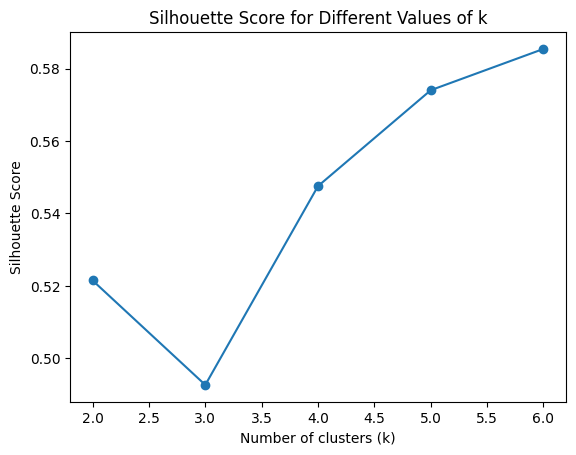

In [8]:
# Visualizing Silhouette scores
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

In [9]:
# Find the optimal k
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters (k) according to Silhouette method:",optimal_k)

Optimal number of clusters (k) according to Silhouette method: 6


In [10]:
# Performing k-means clustering with optimal k
kmeans_model = KMeans(n_clusters= optimal_k, random_state=42)
kmeans_model.fit(pca_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

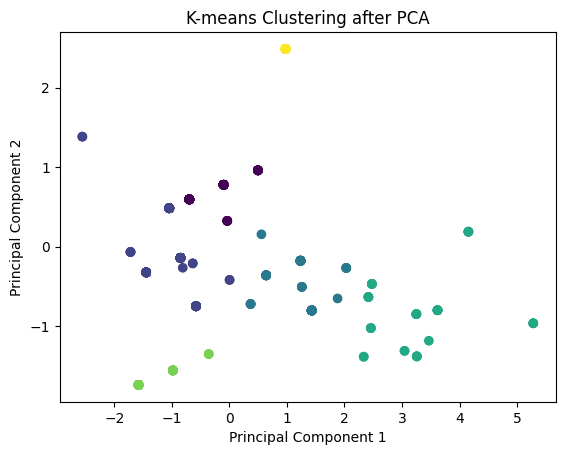

In [11]:

# Visualizing k-means clustering results
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_model.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering after PCA')
plt.show()